**Gradient descent** is a fundamental optimization algorithm used in machine learning and mathematics for finding the minimum value of a function, most often the loss or cost function in various models. It works by iteratively adjusting parameters in the direction that most rapidly decreases the function's output, which is the opposite of the gradient or slope of the function at the current point.

### Core Concept

- Gradient descent involves taking repeated steps, each in the direction of the negative gradient (steepest descent) of the function with respect to its parameters.
- The ultimate goal is to find a parameter set where the cost function is at its lowest possible value—ideally the global minimum, but in practice, it may find a local minimum.
- The size of each step is controlled by the "learning rate"; too large a rate may cause the algorithm to diverge, while too small a rate may make it converge very slowly.

### How It Works

1. Start with an initial guess for the model parameters.
2. Calculate the gradient of the cost function with respect to the parameters; the gradient points in the direction of the steepest increase.
3. Move the parameters in the opposite direction by a certain step (learning rate).
4. Repeat the process until changes become negligibly small or a set number of iterations is reached.

### Mathematical Formula

If θ represents parameters, α is the learning rate, and J(θ) is the cost function:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla J(\theta_{\text{old}})
$$

This formula is applied iteratively until the desired accuracy is achieved.

### Types of Gradient Descent

- **Batch Gradient Descent**: Uses the whole dataset to compute the gradient at every step, which provides stability but is computationally heavy.
- **Stochastic Gradient Descent (SGD)**: Updates parameters for each data point individually, adding randomness and generally converging faster with higher variance.
- **Mini-Batch Gradient Descent**: Conducts updates based on small random subsets (mini-batches), balancing computation and convergence speed. This is especially popular with large datasets or neural networks.
- **Momentum-based, Adagrad, RMSprop, Adam**: These are variants that adjust the step size or direction to speed up convergence and handle different types of data and cost surfaces.

### Uses in Machine Learning

- Training machine learning models such as neural networks, linear and logistic regression, and support vector machines.
- Used for minimizing the cost function to improve model accuracy.
- Essential in deep learning for optimizing the weights of neural networks.

### Limitations

- May only find a local minimum instead of the global minimum, especially for complex, non-convex functions.
- The choice of learning rate is critical; a poor choice can lead to slow convergence or failure to converge.

### Analogy

Gradient descent is like walking down a hill, constantly stepping in the direction where the slope is steepest until reaching the bottom.
Gradient descent is the backbone of model optimization in machine learning and is a foundation for training complex algorithms.

In [21]:
from sklearn.datasets import make_regression
import numpy as np

In [22]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

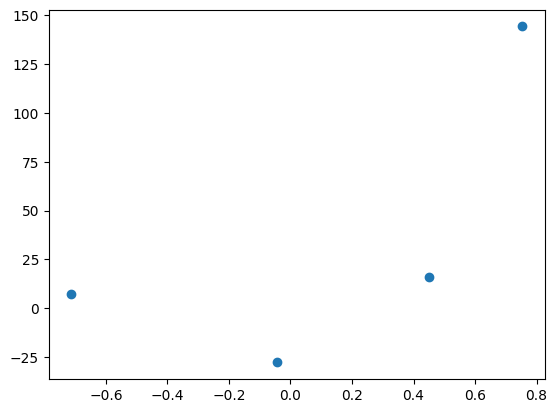

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [24]:
# Lets apply ordinary list square
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
reg.fit(X, y)


LinearRegression()

In [26]:
reg.coef_

array([78.35063668])

In [27]:
reg.intercept_

np.float64(26.15963284313262)

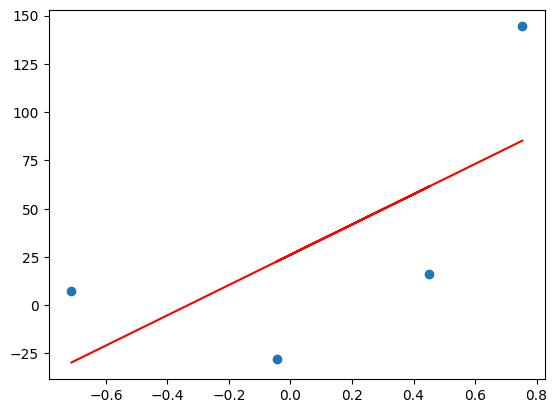

In [28]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red")

**For intuiation- Without loop**

In [29]:
# Lets apply Gradient Descent assuming that slope is constant =78.35
# and lets assume the starting value for intercept b=0
y_pred=((78.35*X)+0).reshape(4)

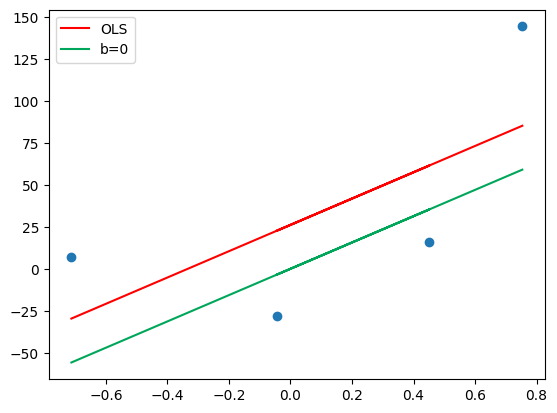

In [30]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred ,color="#00a65a",label='b=0')
plt.legend()
plt.show()

In [31]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-209.27763408209216)

In [32]:
# Lets take learning rate=0.1
lr=0.1
step_size=loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [33]:
# calculating the new intercept
b=b-step_size
b

np.float64(20.927763408209216)

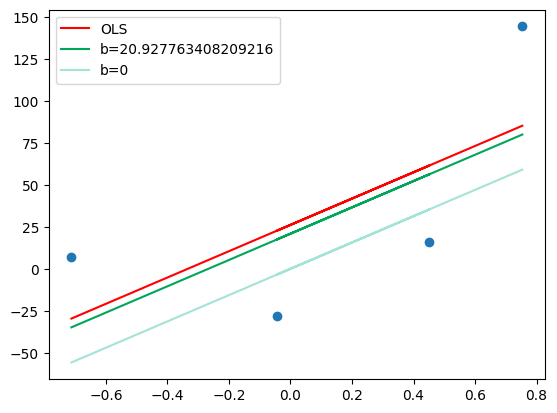

In [34]:
y_pred1=((78.35*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred1,color="#00a65a",label='b={}'.format(b))
plt.plot(X,y_pred ,color="#A3E4D7",label='b=0')
plt.legend()
plt.show()

In [35]:
# iteration 2
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [36]:
step_size=loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [38]:
# calculating the new intercept
b=b-step_size
b

np.float64(29.298868771492906)

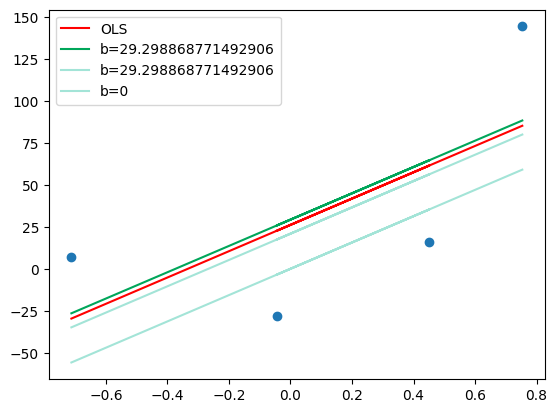

In [40]:
y_pred2=((78.35*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred2,color="#00a65a",label='b={}'.format(b))
plt.plot(X,y_pred1,color="#A3E4D7",label='b={}'.format(b))
plt.plot(X,y_pred ,color="#A3E4D7",label='b=0')
plt.legend()
plt.show()

**same code using loop**

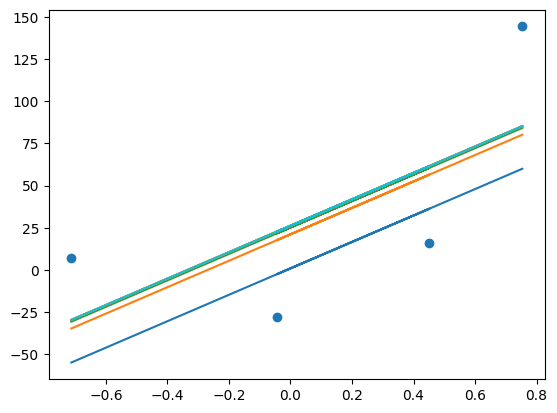

In [42]:
b=-100
m=78.35
lr=0.1
epochs=10
for i in range(epochs):
    loss_slope=-2*np.sum(y-m*X.ravel()-b)
    b=b-(lr*loss_slope)
    y_pred=m*X+b
    plt.plot(X,y_pred)
plt.scatter(X,y)